In [1]:
import json
from functions import read_json

from methods import Single_keyword_Sort_Filter_By_Year, Single_keyword_Sort_Filter_All_Year, Single_keyword_All_Year

from methods import Add_to_tabu_json, Add_to_replace_json

In [2]:
file_dir = './Data_samples/structured_data/words_count.json'
ref_words = './Data_samples/ref_word.json'
display_threshold_per_year = 20  # number of top keywords to display per year
display_threshold_all_years = 50 # number of top keywords to display for the whole year specturm

dic_yr = Single_keyword_Sort_Filter_By_Year(file_dir, display_threshold_per_year)
whole_dic, original_occur = Single_keyword_Sort_Filter_All_Year(file_dir, display_threshold_all_years)

/Users/qmy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/qmy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


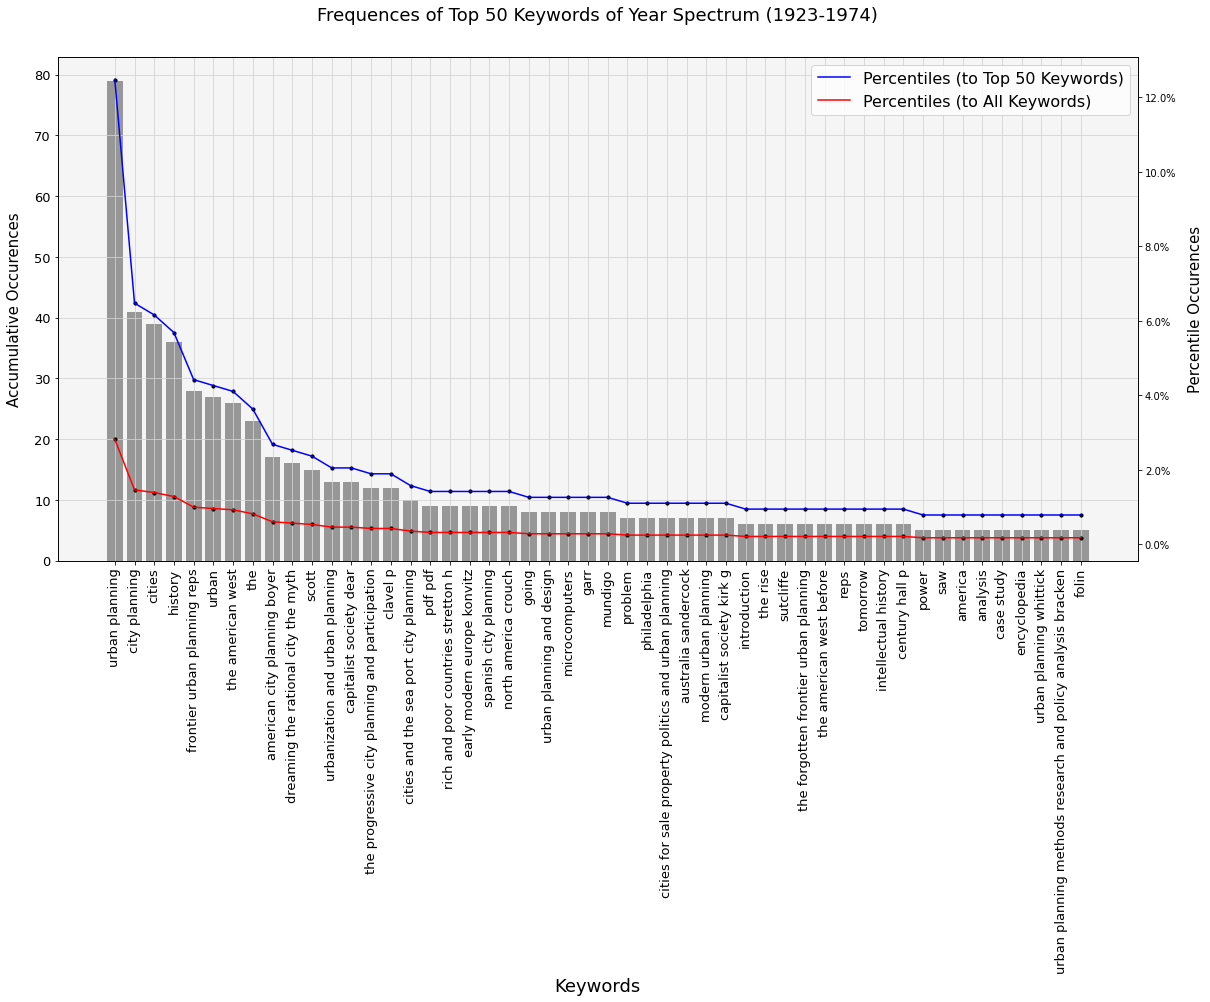

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def Plot_Whole_Year_Barchart(file_dir, display_threshold_all_years):

    whole_dic, original_occur = Single_keyword_Sort_Filter_All_Year(file_dir, display_threshold_all_years)

    X_lis = whole_dic.keys()
    Y_lis_temp = whole_dic.values()

    # Make sure every accum num is a positive integer
    Y_lis = [int(max(y,0)) for y in Y_lis_temp]

    Y_pesudo = [y/sum(Y_lis) for y in Y_lis_temp]
    Y_perc_lis = [y/int(original_occur) for y in Y_lis]

    fig = plt.figure(figsize=(15,7))
    ax1 = fig.add_axes([0, 0, 1, 1])
    ax2 = ax1.twinx()
    ax1.set(facecolor = "whitesmoke")
    ax1.grid(axis='both', color='lightgray')

    ax1.bar(X_lis, Y_lis, align='center', color='gray', label='Accumulative Occurences', alpha = 0.8)
    ax2.plot(X_lis, Y_pesudo, linewidth=1.5, color='blue', label='Percentiles (to Top %d Keywords)'%display_threshold_all_years) 
    ax2.plot(X_lis, Y_perc_lis, linewidth=1.5, color='red', label='Percentiles (to All Keywords)')

    ax2.scatter(X_lis, Y_pesudo, s=10, color='k', edgecolors='k')
    ax2.scatter(X_lis, Y_perc_lis, s=10, color='k', edgecolors='k')

    ax.axvline(x=opt_id, c=c_lis[idx], lw=1.5, linestyle='dashed', label=solver+'_Optima', alpha = 0.8)
    ax.annotate(opt_id, (opt_id, 50), c=c_lis[idx], fontsize = 12)
    
    ax1.tick_params(axis='both', which='major', labelsize=13)
    ax1.tick_params(axis='both', which='minor', labelsize=13)
    
    ax1.set_xlabel('Keywords', fontsize=18)
    ax1.set_xticklabels(X_lis, rotation=90)
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

    ax1.set_ylabel("Accumulative Occurences", fontsize=15, labelpad=12)
    ax2.set_ylabel("Percentile Occurences", fontsize=15, labelpad=12)

    ax1.set_title('Frequences of Top %d Keywords of Year Spectrum (1923-1974)'%display_threshold_all_years, fontsize=18, y=1.06)

    plt.legend(loc='upper right', fontsize=16, ncol=1)

    plt.tight_layout()

    plt.savefig('./Outputs/All_year_single_word_frequencies.png', dpi=300, bbox_inches='tight')
    plt.show()

Plot_Whole_Year_Barchart(file_dir, display_threshold_all_years)


### Adding Ref_words to ref_word

In [3]:
Add_to_tabu_json('problem', ref_words)
Add_to_replace_json('town planning','urban planning',ref_words)

The word 'problem' already exists
Succefully added 'town planning' to existing mainword 'urban planning'
